In [1]:
import xarray as xr 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import numpy as np
from shapely.geometry import box

In [ ]:
data = xr.open_dataset('../generated/m_3009630_nw_14_060_20220612.tif')
aoi = gpd.read_file('../data/disaster_city.geojson').to_crs(data.rio.crs)
aoi_bbox = gpd.GeoDataFrame(geometry=[box(*aoi.total_bounds)], crs=aoi.crs)

clipped_data = data.rio.clip(aoi_bbox.geometry)

clipped_data.to_netcdf('../data/disaster_city.nc')

/tmp/ipykernel_57679/2048563088.py:7: SerializationWarning: saving variable band_data with floating point data as an integer dtype without any _FillValue to use for NaNs
  clipped_data.to_netcdf('data/disaster_city.nc')


In [3]:
clipped_data

<xarray.Dataset> Size: 23MB
Dimensions:      (band: 4, x: 1215, y: 1169)
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 10kB 7.537e+05 7.537e+05 ... 7.545e+05 7.545e+05
  * y            (y) float64 9kB 3.386e+06 3.386e+06 ... 3.385e+06 3.385e+06
    spatial_ref  int64 8B 0
Data variables:
    band_data    (band, y, x) float32 23MB 135.0 183.0 197.0 ... 152.0 156.0

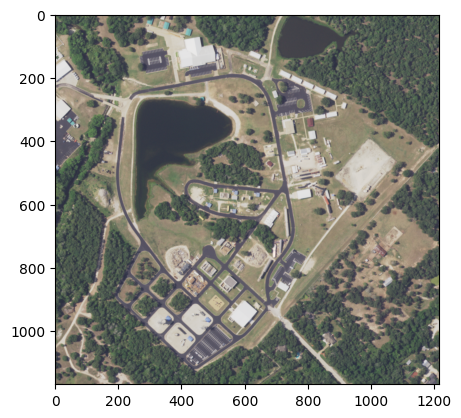

In [4]:
rgb = clipped_data.to_array().values.squeeze()
rgb = np.moveaxis(rgb, 0, -1)[:, :, :3]

plt.imshow(rgb.astype('uint8'))